# Homework 5: taming text

In [1]:
import pandas as pd
import numpy as np
from os import path
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk import stem

## Part 1: word clouds

We start by taking a look at the data

In [2]:
data = pd.read_csv("./hillary-clinton-emails/Emails.csv")
data.head()

,Id,DocNumber,MetadataSubject,MetadataTo,MetadataFrom,SenderPersonId,MetadataDateSent,MetadataDateReleased,MetadataPdfLink,MetadataCaseNumber,...,ExtractedTo,ExtractedFrom,ExtractedCc,ExtractedDateSent,ExtractedCaseNumber,ExtractedDocNumber,ExtractedDateReleased,ExtractedReleaseInPartOrFull,ExtractedBodyText,RawText
0,1,C05739545,WOW,H,"Sullivan, Jacob J",87.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739545...,F-2015-04841,...,NaN,"Sullivan, Jacob J <Sullivan11@state.gov>",NaN,"Wednesday, September 12, 2012 10:16 AM",F-2015-04841,C05739545,05/13/2015,RELEASE IN FULL,NaN,UNCLASSIFIED\r\nU.S. Department of State\r\nCa...
1,2,C05739546,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,H,NaN,NaN,2011-03-03T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739546...,F-2015-04841,...,NaN,NaN,NaN,NaN,F-2015-04841,C05739546,05/13/2015,RELEASE IN PART,"B6\r\nThursday, March 3, 2011 9:45 PM\r\nH: La...",UNCLASSIFIED\r\nU.S. Department of State\r\nCa...
2,3,C05739547,CHRIS STEVENS,;H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739547...,F-2015-04841,...,B6,"Mills, Cheryl D <MillsCD@state.gov>","Abedin, Huma","Wednesday, September 12, 2012 11:52 AM",F-2015-04841,C05739547,05/14/2015,RELEASE IN PART,Thx,UNCLASSIFIED\r\nU.S. Department of State\r\nCa...
3,4,C05739550,CAIRO CONDEMNATION - FINAL,H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739550...,F-2015-04841,...,NaN,"Mills, Cheryl D <MillsCD@state.gov>","Mitchell, Andrew B","Wednesday, September 12,2012 12:44 PM",F-2015-04841,C05739550,05/13/2015,RELEASE IN PART,NaN,UNCLASSIFIED\r\nU.S. Department of State\r\nCa...
4,5,C05739554,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,"Abedin, Huma",H,80.0,2011-03-11T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739554...,F-2015-04841,...,NaN,NaN,NaN,NaN,F-2015-04841,C05739554,05/13/2015,RELEASE IN PART,"H <hrod17@clintonemail.com>\r\nFriday, March 1...",B6\r\nUNCLASSIFIED\r\nU.S. Department of State...


We are only interested in the content of the email, in this case the ExtractedBodyText and the ExtractedSubject.

In [3]:
data.ExtractedBodyText = data.ExtractedBodyText.fillna('')
data.ExtractedSubject = data.ExtractedSubject.fillna('')
mails = pd.DataFrame(data.ExtractedSubject + " " + data.ExtractedBodyText)
mails.columns = ['content']
mails.head()

,content
0,FW: Wow
1,"B6\r\nThursday, March 3, 2011 9:45 PM\r\nH: L..."
2,Re: Chris Stevens Thx
3,FVV: Cairo Condemnation - Final
4,"H <hrod17@clintonemail.com>\r\nFriday, March ..."


In order to create the first world cloud we need to concatenate all the email content together.

In [4]:
content = mails.content.str.cat(sep=' ')
content[0:100]

'FW: Wow   B6\r\nThursday, March 3, 2011 9:45 PM\r\nH: Latest How Syria is aiding Qaddafi and more... Sid'

In [5]:
wordcloud = WordCloud().generate(content)

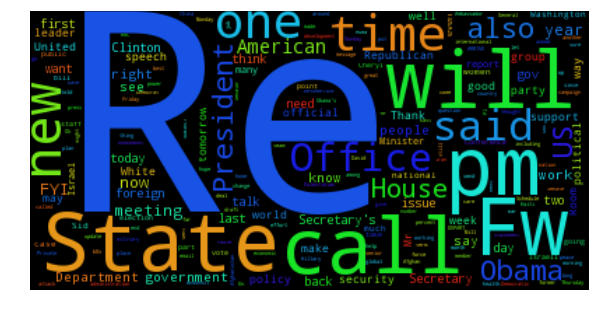

In [6]:
plt.subplots(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

We will now pre-process the text in order to remove words such as re, fw, pm, new, also, many. This way our worldcloud will contain more useful words.

### Text pre-processing

We start by **tokenizing** the text. The regex tokenizer will also remove ponctuation.

In [7]:
# nltk.download() # run this if lookup error english.pickle
tokenizer = RegexpTokenizer(r'\w+')
tokens = tokenizer.tokenize(content)
tokens[0:10]

['FW', 'Wow', 'B6', 'Thursday', 'March', '3', '2011', '9', '45', 'PM']

We transform the tokens to all lowercase.

In [8]:
tokens = [x.lower() for x in tokens]
tokens[0:10]

['fw', 'wow', 'b6', 'thursday', 'march', '3', '2011', '9', '45', 'pm']

In [9]:
len(tokens)

657567

Next we **remove stopwords**.

In [10]:
stop = stopwords.words('english') + ['re', 'fw', 'pm', 'am']
tokens = [word for word in tokens if word not in stop]
tokens[0:10]

['wow', 'b6', 'thursday', 'march', '3', '2011', '9', '45', 'h', 'latest']

In [11]:
len(tokens)

383148

Next we apply **stemming**.

In [12]:
sno = stem.SnowballStemmer('english')
tokens = [sno.stem(x) for x in tokens]
tokens[0:10]

['wow', 'b6', 'thursday', 'march', '3', '2011', '9', '45', 'h', 'latest']

In [13]:
content = ' '.join(tokens)
content[0:100]

'wow b6 thursday march 3 2011 9 45 h latest syria aid qaddafi sid hrc memo syria aid libya 030311 doc'

In [14]:
wordcloud = WordCloud().generate(content)

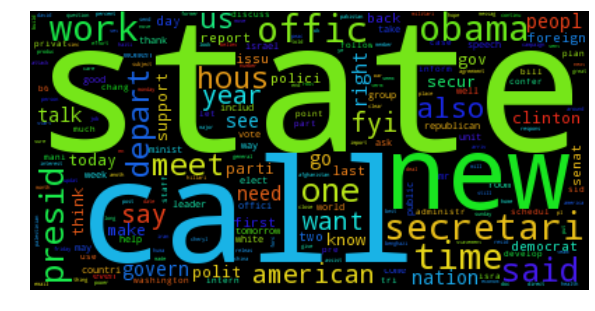

In [15]:
plt.subplots(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

TODO: discuss pros and cons